### 피마 인디언 당뇨병 예측

### https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

- 당뇨병 여부를 판단.
- 피마 인디언 당뇨병 데이터 셋트는 북아메리카 피마 지역 원주민의  Type-2 당뇨병 결과 데이터. 

- 보통 당뇨 원인으로 식습관과 유전을 꼽습니다.

- 피마 지역은 고립된 지역에서 인디언 고유의 혈통이 지속돼 왔지만, 20세기 후반에 들어서면서 서구화된 식습관으로 당뇨 환자가 생김.

 - Pregnancies : 임신 횟수 -> Number of times pregnant
 - Glucose : 포도당 부하 검사 수치 -> Plasma glucose concentration a 2 hours in an oral glucose tolerance test
 - bloodPressure:혈압(mm Hg) -> Diastolic blood pressure (mm Hg)
 - SkinThickness : 팔 삼두근 뒤쪽의 피하지방 측정값(mm) ->Triceps skin fold thickness (mm)
 - Insulin : 2시간 혈청 인슐린(mu U/ml) ->2-Hour serum insulin (mu U/ml)
 - BMI : 체질량 지수( 체중(kg) / (키(m)^2)) -> Body mass index (weight in kg/(height in m)^2)
 - DiabetesPedigressFunction : 당뇨병 혈통 기능. ->Diabetes pedigree function
 - Age : 나이 ->age(years)
 - Outcome : class 결정 값 (0 또는 1) -> Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

indian_df = pd.read_csv('/content/drive/MyDrive/Indian/diabetes.csv')

## 결측치를 어떻게 처리할 것인가?


In [ ]:
indian_N = pd.read_csv('/content/drive/MyDrive/Indian/diabetes.csv')

In [ ]:
indian_Sk = indian_N[indian_N['SkinThickness'] == 0]

In [ ]:
indian_Sk.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,227.000000,227.000000,227.000000,227.0,227.0,227.000000,227.000000,227.000000,227.000000
mean,4.638767,123.449339,64.118943,0.0,0.0,30.129956,0.393291,37.251101,0.387665
std,3.350062,29.572931,28.839945,0.0,0.0,9.168249,0.276871,13.062933,0.488294
min,0.000000,44.000000,0.000000,0.0,0.0,0.000000,0.078000,21.000000,0.000000
25%,2.000000,105.000000,62.000000,0.0,0.0,25.150000,0.203000,27.000000,0.000000
50%,4.000000,120.000000,72.000000,0.0,0.0,30.400000,0.282000,34.000000,0.000000
75%,7.000000,140.500000,80.000000,0.0,0.0,35.050000,0.536500,45.000000,1.000000
max,13.000000,197.000000,122.000000,0.0,0.0,52.900000,1.781000,72.000000,1.000000


In [ ]:
indian_Bl = indian_N[indian_N['BloodPressure'] == 0]

In [ ]:
indian_In = indian_N[indian_N['Insulin'] == 0]
indian_NotIn = indian_N[indian_N['Insulin'] != 0]

In [ ]:
indian_Bl.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,35.000000,35.000000,35.0,35.000000,35.0,35.000000,35.000000,35.000000,35.000000
mean,3.628571,117.800000,0.0,1.514286,0.0,25.705714,0.388429,30.714286,0.457143
std,3.646801,27.488821,0.0,6.298326,0.0,14.874553,0.254266,9.820661,0.505433
min,0.000000,73.000000,0.0,0.000000,0.0,0.000000,0.102000,21.000000,0.000000
25%,0.000000,97.500000,0.0,0.000000,0.0,21.650000,0.197500,24.500000,0.000000
50%,2.000000,117.000000,0.0,0.000000,0.0,28.900000,0.282000,28.000000,0.000000
75%,6.000000,133.500000,0.0,0.000000,0.0,34.550000,0.573500,34.000000,1.000000
max,13.000000,183.000000,0.0,30.000000,0.0,52.300000,0.933000,72.000000,1.000000


<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Density'>

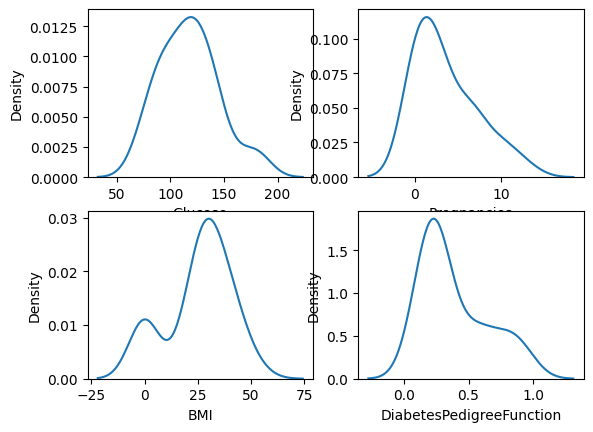

In [ ]:
fx, ax = plt.subplots(
    nrows = 2,
    ncols = 2
)
sns.kdeplot(
    x = 'Glucose',
    data = indian_Bl,
    ax = ax[0][0]
)
sns.kdeplot(
    x = 'Pregnancies',
    data = indian_Bl,
    ax = ax[0][1]
)
sns.kdeplot(
    x = 'BMI',
    data = indian_Bl,
    ax = ax[1][0]
)
sns.kdeplot(
    x = 'DiabetesPedigreeFunction',
    data = indian_Bl,
    ax = ax[1][1]
)

In [ ]:
indian_In.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,374.000000,374.000000,374.000000,374.000000,374.0,374.000000,374.000000,374.000000,374.000000
mean,4.433155,119.409091,67.473262,11.508021,0.0,30.943316,0.415340,35.796791,0.368984
std,3.437621,32.544233,24.522312,15.738605,0.0,8.419854,0.300547,12.729034,0.483176
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.250000,64.000000,0.000000,0.0,26.500000,0.209000,25.000000,0.000000
50%,4.000000,115.000000,72.000000,0.000000,0.0,31.200000,0.302500,32.000000,0.000000
75%,7.000000,138.000000,80.000000,26.750000,0.0,35.675000,0.553250,43.000000,1.000000
max,14.000000,199.000000,122.000000,99.000000,0.0,52.900000,1.893000,72.000000,1.000000


<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Density'>

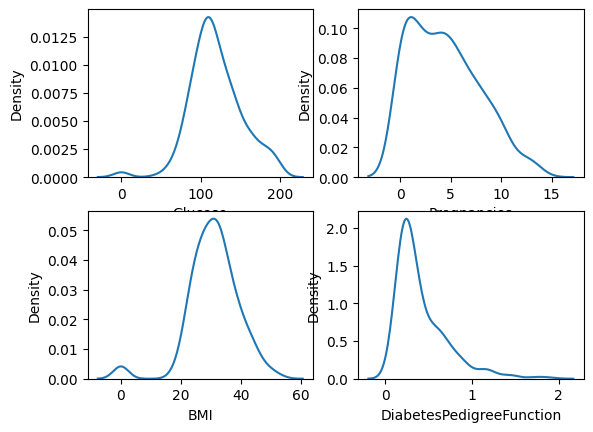

In [ ]:
fx, ax = plt.subplots(
    nrows = 2,
    ncols = 2
)
sns.kdeplot(
    x = 'Glucose',
    data = indian_In,
    ax = ax[0][0]
)
sns.kdeplot(
    x = 'Pregnancies',
    data = indian_In,
    ax = ax[0][1]
)
sns.kdeplot(
    x = 'BMI',
    data = indian_In,
    ax = ax[1][0]
)
sns.kdeplot(
    x = 'DiabetesPedigreeFunction',
    data = indian_In,
    ax = ax[1][1]
)

In [ ]:
indian_NotIn.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.286802,122.304569,70.654822,29.106599,155.548223,32.988579,0.525543,30.814721,0.329949
std,3.209635,31.396725,12.469919,10.504273,118.775855,7.210160,0.350127,10.198971,0.470792
min,0.000000,0.000000,24.000000,7.000000,14.000000,0.000000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.250000,28.325000,0.270250,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.000000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,36.750000,190.000000,37.075000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Density'>

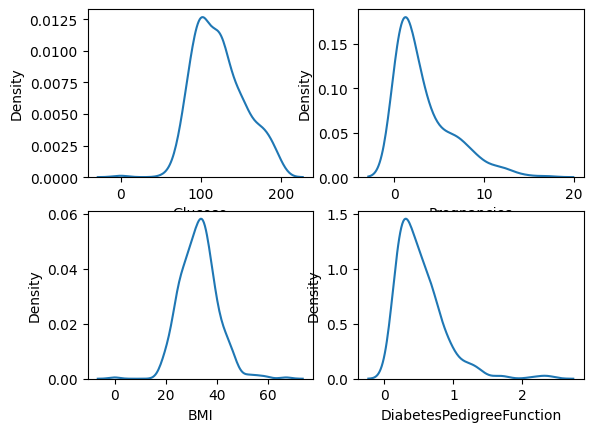

In [ ]:
fx, ax = plt.subplots(
    nrows = 2,
    ncols = 2
)
sns.kdeplot(
    x = 'Glucose',
    data = indian_NotIn,
    ax = ax[0][0]
)
sns.kdeplot(
    x = 'Pregnancies',
    data = indian_NotIn,
    ax = ax[0][1]
)
sns.kdeplot(
    x = 'BMI',
    data = indian_NotIn,
    ax = ax[1][0]
)
sns.kdeplot(
    x = 'DiabetesPedigreeFunction',
    data = indian_NotIn,
    ax = ax[1][1]
)

In [ ]:
indian_NotIn.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1


### 정보 확인

In [ ]:
# 크기
indian_df.shape

(768, 9)

In [ ]:
indian_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
indian_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
indian_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
indian_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
indian_df['Glucose'].value_counts()[0]

5

In [ ]:
indian_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
indian_df['Glucose'] = indian_df['Glucose'].map(lambda x : np.nan if x == 0 else x)

- bmi 0인경우
- 인슐린 0인경우
- 포도당 0일경우
- 결측치로 판단

In [ ]:
indian_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
indian_df = indian_df.dropna()

<Axes: ylabel='Outcome'>

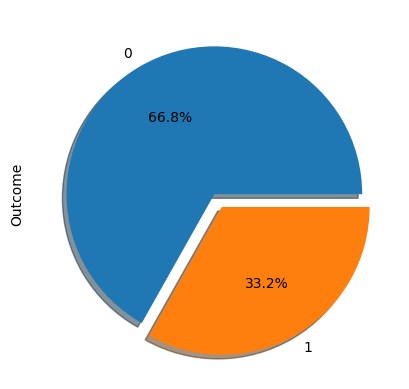

In [ ]:
# 당뇨병 여부 비율
indian_df['Outcome'].value_counts().plot.pie(
    explode = [0, 0.1],
    autopct = '%1.1f%%',
    shadow = True
)

In [ ]:
def Facet_Graph(x):
  facet = sns.FacetGrid(
      indian_df,
      hue = 'Outcome',
      aspect = 4
  )
  facet.map(
      sns.kdeplot,
      x,
      shade = True
  )
  facet.set(
      xlim = (0, indian_df[x].max())
  )
  facet.add_legend()
  sns.axes_style('dark')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


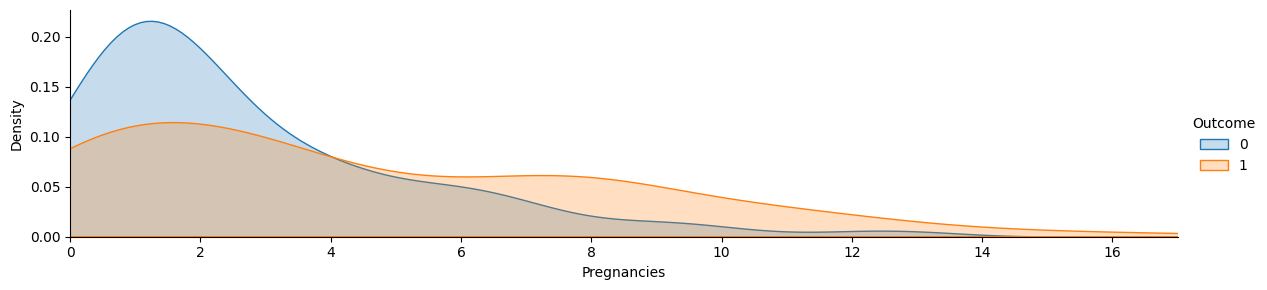

In [ ]:
# 임심 횟수에 따른 당뇨병 여부
Facet_Graph('Pregnancies')

- 임신에 따른 정상인이 점차 줄어드는 것을 볼수 있다.
- 해당 임신으로 인해 당뇨병에 걸리는 것으로 볼수도 있다.
- https://www.amc.seoul.kr/asan/mobile/healthinfo/disease/diseaseDetail.do?contentId=31837

<Axes: xlabel='Pregnancies', ylabel='Age'>

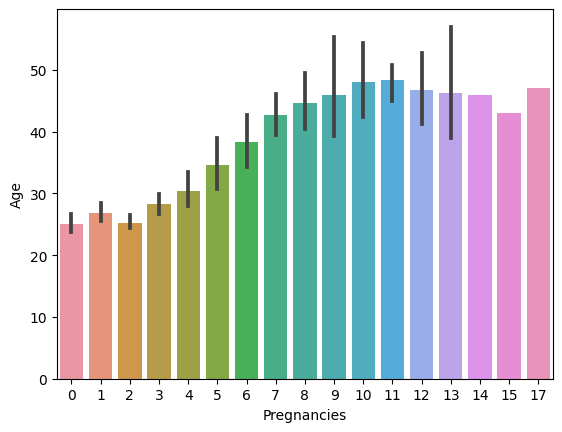

In [ ]:
# 임신횟수가 늘어 날수록 나이가 늘어난다.
sns.barplot(
    x = 'Pregnancies',
    y = 'Age',
    data = indian_df
)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


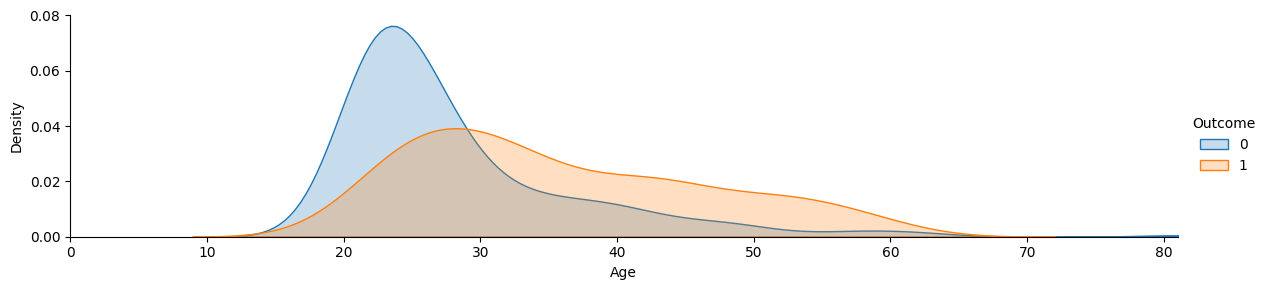

In [ ]:
# 나이에 따른 당뇨병 여부
Facet_Graph('Age')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


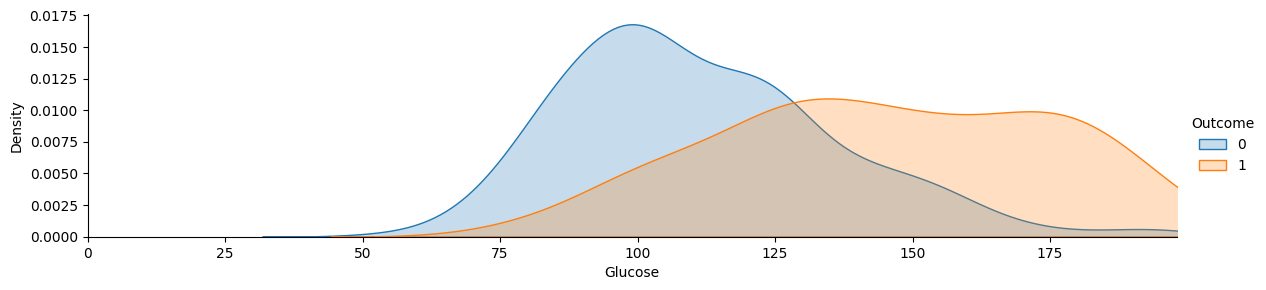

In [ ]:
# 포도당 부하 검사에 따른 당뇨병 여부
Facet_Graph('Glucose')

<Axes: xlabel='Glucose', ylabel='Insulin'>

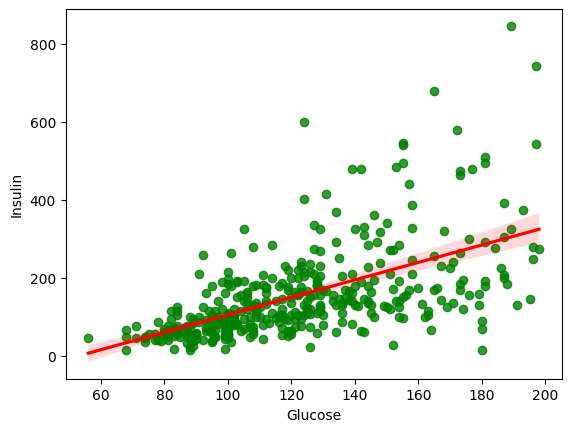

In [ ]:
sns.regplot(
    x = 'Glucose',
    y = 'Insulin',
    data = indian_df,
    scatter_kws={"color": "g"},
    line_kws={"color": "red"},
  )

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


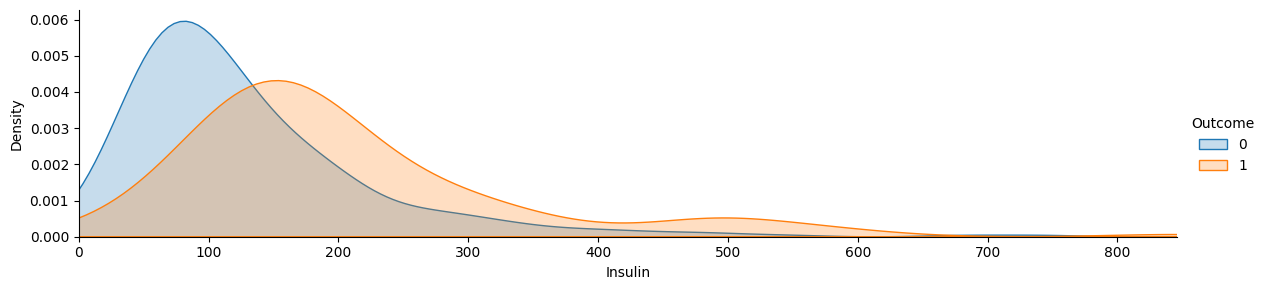

In [ ]:
# 2시간 혈청 인슐린에 따른 당뇨병 여부 확인
Facet_Graph('Insulin')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


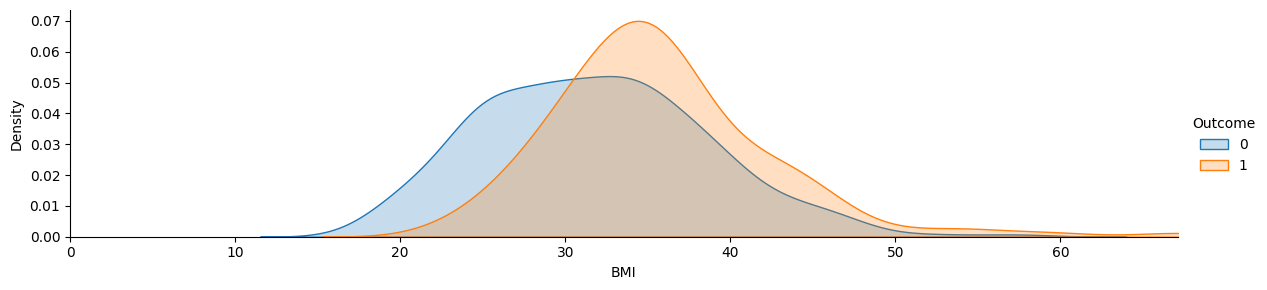

In [ ]:
# BMI수치에 따라 당뇨병 여부 확인
Facet_Graph('BMI')

<Axes: xlabel='BMI', ylabel='SkinThickness'>

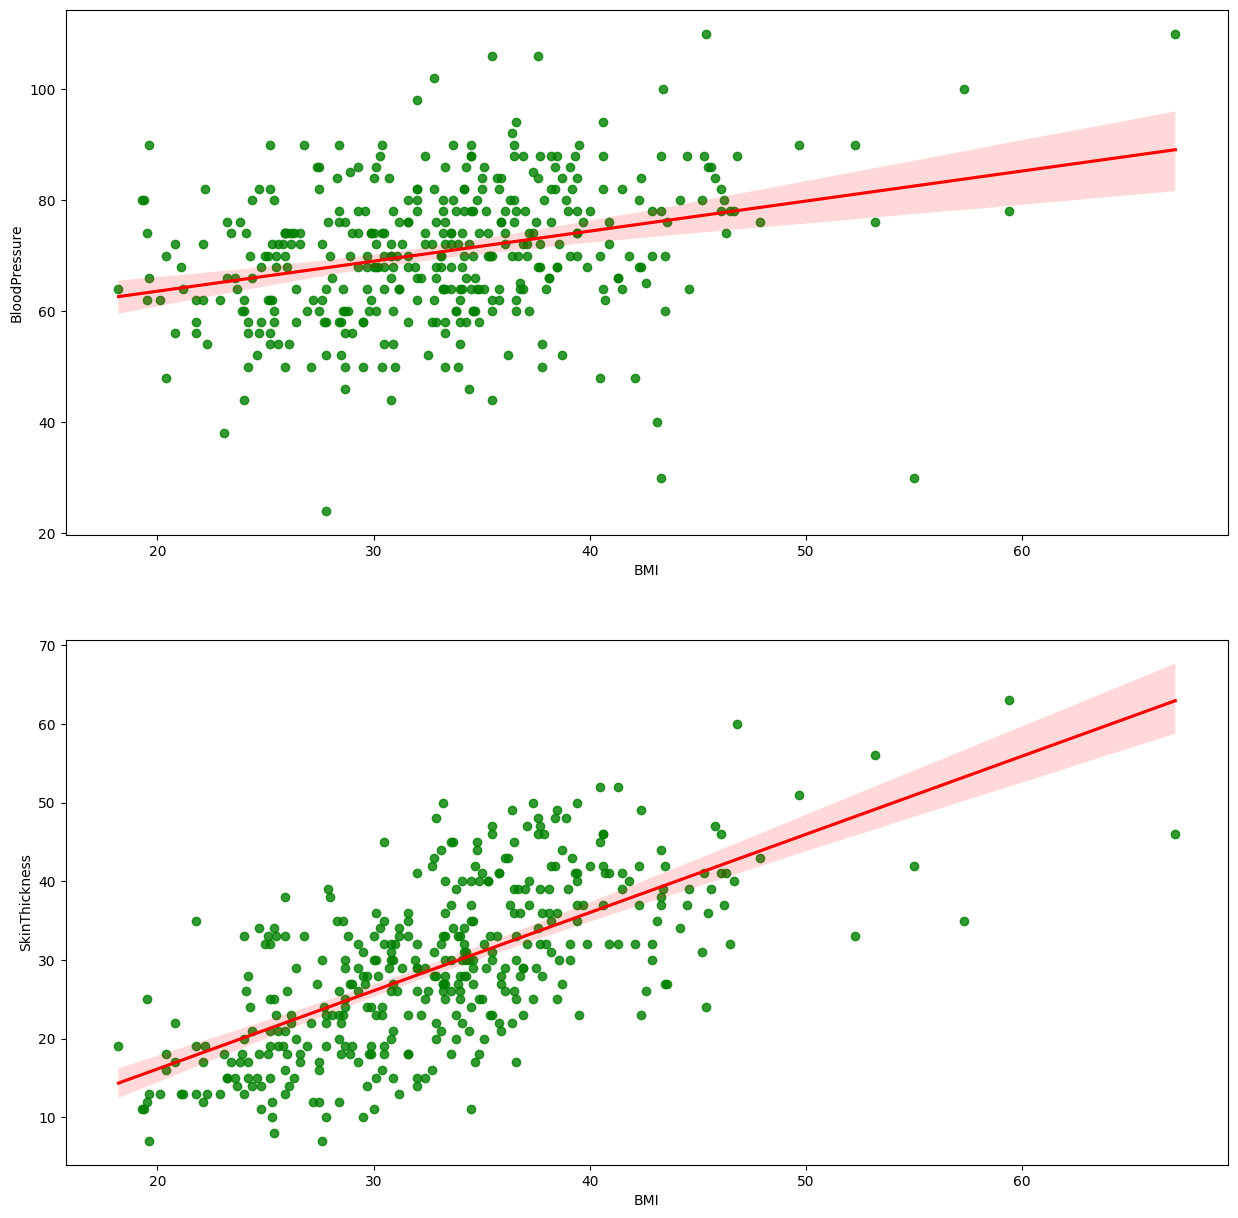

In [ ]:
fx, ax = plt.subplots(figsize = (15,15), nrows=2)
sns.regplot(
    x = 'BMI',
    y = 'BloodPressure',
    data = indian_df,
    scatter_kws={"color": "g"},
    line_kws={"color": "red"},
    ax = ax[0]
  )

sns.regplot(
    x = 'BMI',
    y = 'SkinThickness',
    data = indian_df,
    scatter_kws={"color": "g"},
    line_kws={"color": "red"},
    ax = ax[1]
  )

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


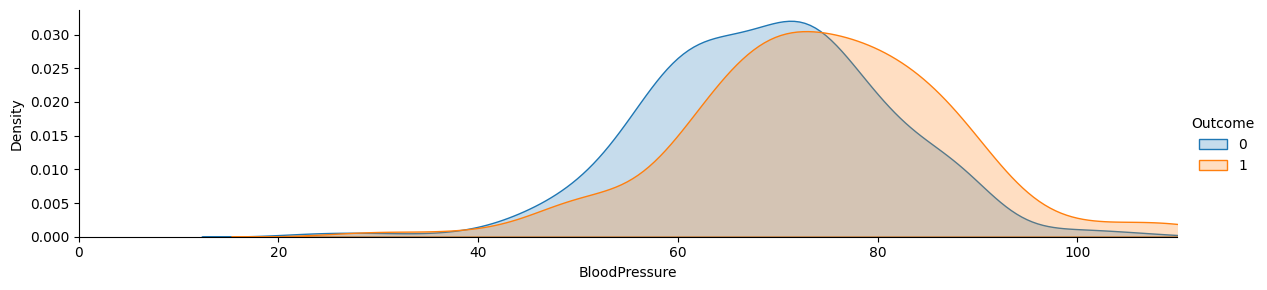

In [ ]:
# 혈압 수치에 따른 당뇨병 여부 확인
Facet_Graph('BloodPressure')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


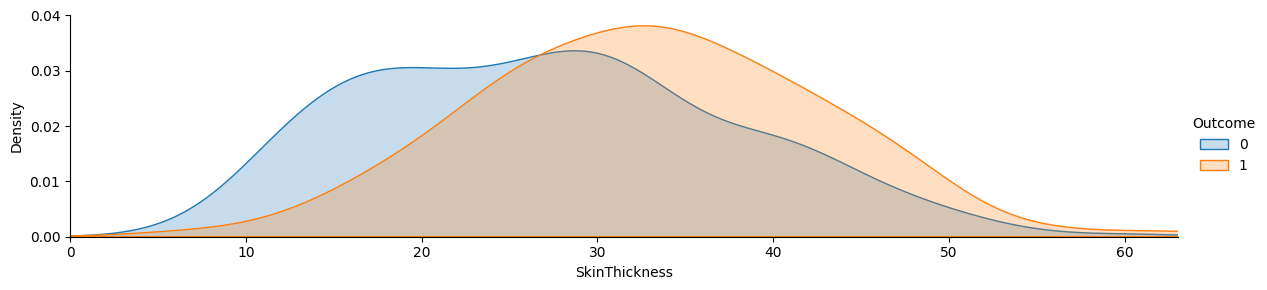

In [ ]:
# 팔 삼두근 뒤쪽의 피하지방 측정값에 따른 당뇨병 여부 확인
Facet_Graph('SkinThickness')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


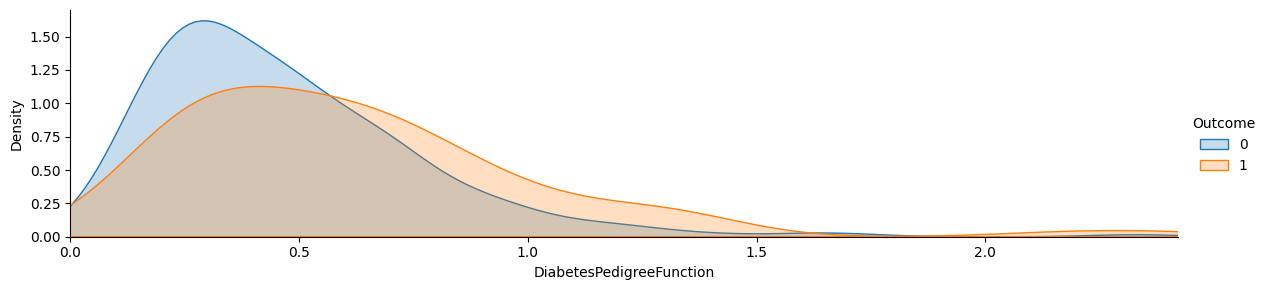

In [ ]:
# 당뇨병 혈통 기능에 따른 당뇨병 여부 확인
Facet_Graph('DiabetesPedigreeFunction')

<Axes: >

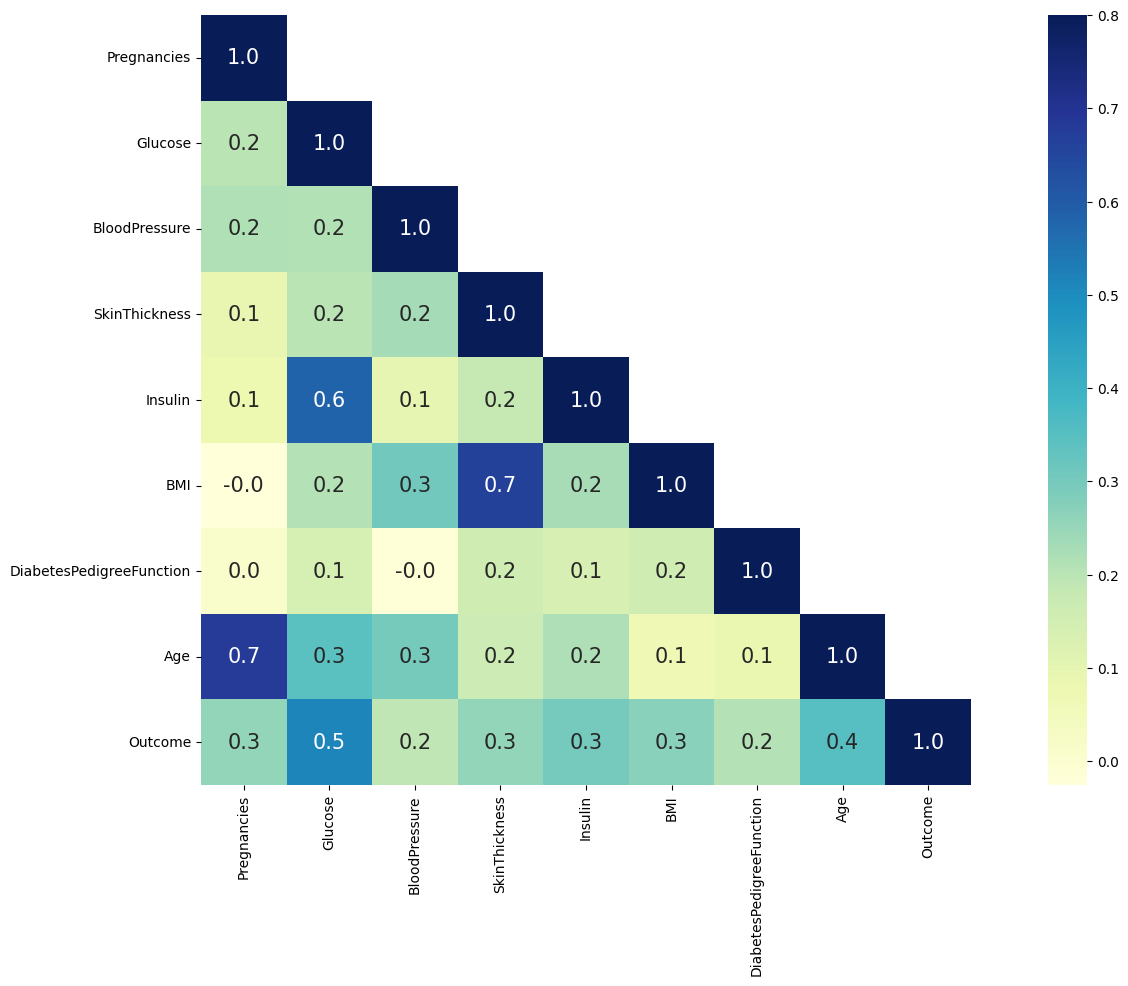

In [ ]:
#관계성 보기
corr = indian_df.corr()

mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)

sns.heatmap(
    corr,
    mask = mask,
    vmax = .8,
    square = True,
    annot = True,
    fmt = '.1f',
    annot_kws= {'size' : 15},
    cmap = 'YlGnBu'
)

# Glucose, BMI, Pregnancies, DiabetesPedigressFunction, Age 순으로 영향을 받는다.
# 포도당, 체질량, 임심횟수, 당뇨병 혈통, 나이

### 당뇨병과 가장 연관이 깊은 **포도당**
  - 정상 혈당은 최소 8시간 이상 음식을 섭취하지 않은 상태에서 공복 혈장 포도당 100 mg/dL 미만, 75 g 경구 포도당 부하검사 2시간 후 혈장 포도당 140 mg/dL 미만입니다.
  - 즉, 140미만이 정상 (Plasma glucose concentration a 2 hours in an oral glucose tolerance test)
  - https://health.kdca.go.kr/healthinfo/biz/health/gnrlzHealthInfo/gnrlzHealthInfo/gnrlzHealthInfoView.do?cntnts_sn=5305#:~:text=%EC%A0%95%EC%83%81%20%ED%98%88%EB%8B%B9%EC%9D%80%20%EC%B5%9C%EC%86%8C%208,140%20mg%2FdL%20%EB%AF%B8%EB%A7%8C%EC%9E%85%EB%8B%88%EB%8B%A4.

In [ ]:
indian_T = indian_df.copy()

In [ ]:
indian_T['IsGlucose'] = indian_T['Glucose'].map(lambda x : 'nomal' if x < 140 else 'abnomal')

<Axes: xlabel='IsGlucose', ylabel='count'>

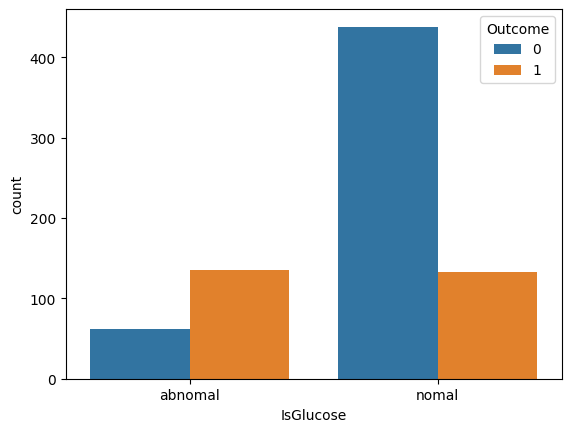

In [ ]:
# 포도당 정상, 비정상 비율에 따른 당뇨병 여부 확인
sns.countplot(
    x = 'IsGlucose',
    data = indian_T,
    hue = 'Outcome'
)

### 당뇨병과 연관이 있는 **BMI**
 - 우선 Pima는 누구인가?
  - Pima, North American Indians who traditionally lived along the Gila and Salt rivers in Arizona, U.S.
  - Pima는 전통적으로 미국 애리조나의 Gila 강과 Salt 강을 따라 살았던 북미 인디언입니다.

- 즉, 미국 BMI를 기준으로 조사한다.
- https://www.britannica.com/topic/Pima-people
- 18.5 ~ 24.9 - 정상, 25 ~ 29 - 과체중
- http://www.monews.co.kr/news/articleView.html?idxno=310982#:~:text=%EC%A7%84%EB%A3%8C%EC%A7%80%EC%B9%A8%EC%9C%84%EC%9B%90%ED%9A%8C%EB%8A%94%20BMI,%EC%97%84%EA%B2%A9%ED%95%98%EB%8B%A4%EB%8A%94%20%EC%A7%80%EC%A0%81%EC%9D%B4%20%EC%9E%88%EC%97%88%EB%8B%A4.

In [ ]:
indian_T['IsBMI'] = indian_T['BMI'].map(lambda x : 'nomal' if x >= 18.5 and x < 30 else 'abnomal')

<Axes: xlabel='IsBMI', ylabel='count'>

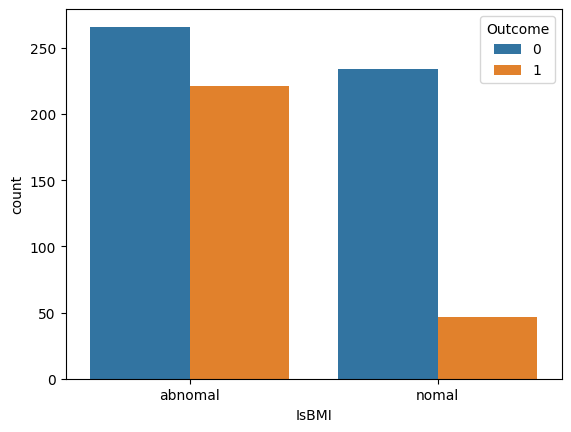

In [ ]:
sns.countplot(
    x = 'IsBMI',
    data = indian_T,
    hue = 'Outcome'
)

In [ ]:
indian_data = indian_df.drop('Outcome', axis = 1)
indian_target = indian_df['Outcome']

In [ ]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(
    indian_data,
    indian_target,
    test_size = 0.2,
    random_state = 50
)

model = LogisticRegression(max_iter = 5000)
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8354430379746836

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Text(0, 0.5, 'score')

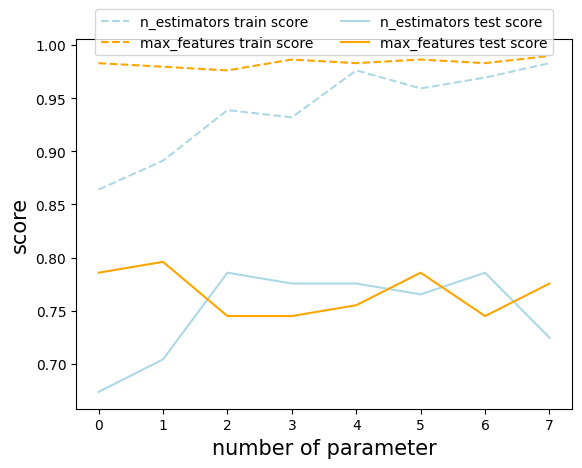

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    indian_data,
    indian_target,
    stratify = indian_target,
    random_state = 50
)

n_features = indian_data.shape[1]

score_n_tr_est = []
score_n_te_est = []
score_m_tr_mft = []
score_m_te_mft = []

for i in np.arange(1, n_features +1):
  params_n = {
      'n_estimators' : i,
      'max_features' : 'auto',
      'n_jobs' : -1
  }
  params_m = {
      'n_estimators' : 10,
      'max_features' : i,
      'n_jobs' : -1
  }

  forest_n = RandomForestClassifier(**params_n).fit(X_train, y_train)
  forest_m = RandomForestClassifier(**params_m).fit(X_train, y_train)

  score_n_tr = forest_n.score(X_train, y_train)
  score_n_te = forest_n.score(X_test, y_test)
  score_m_tr = forest_m.score(X_train, y_train)
  score_m_te = forest_m.score(X_test, y_test)

  score_n_tr_est.append(score_n_tr)
  score_n_te_est.append(score_n_te)
  score_m_tr_mft.append(score_m_tr)
  score_m_te_mft.append(score_m_te)

index = np.arange(len(score_n_tr_est))

plt.plot(
    index,
    score_n_tr_est,
    label = 'n_estimators train score',
    color = 'lightblue',
    ls = '--'
)
plt.plot(
    index,
    score_m_tr_mft,
    label = 'max_features train score',
    color = 'orange',
    ls = '--'
)

plt.plot(
    index,
    score_n_te_est,
    label = 'n_estimators test score',
    color = 'lightblue',
    ls = '-'
)
plt.plot(
    index,
    score_m_te_mft,
    label = 'max_features test score',
    color = 'orange',
    ls = '-'
)

plt.legend(
    loc = 'upper center',
    bbox_to_anchor = (0.5, 1.1),
    ncol = 2,
    fancybox = True,
    shadow = False
)
plt.xlabel('number of parameter', size = 15)
plt.ylabel('score', size = 15)

Text(0, 0.5, 'feature')

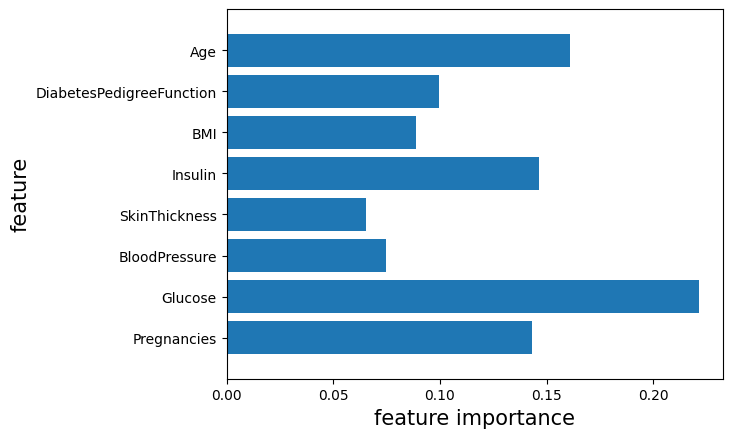

In [ ]:
forest = RandomForestClassifier(
    n_estimators = 5,
    n_jobs = -1,
)
forest.fit(X_train, y_train)
plt.barh(
    index,
    forest.feature_importances_,
    align = 'center'
)
plt.yticks(index, indian_data.keys())
plt.ylim(-1, n_features)
plt.xlabel('feature importance', size = 15)
plt.ylabel('feature', size = 15)